# Problem Statement

Creating a fully-automated system that can uses today's weather data for a given location to predict whether it will rain at the location tomorrow.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
matplotlib.rcParams['figure.figsize'] = (12,6)
%matplotlib inline

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# If rainTomorrow is null, then we can not predict status of rain, so drop these rows
df = df.dropna(subset = "RainTomorrow")

In [5]:
df.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4
max,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7


In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

<AxesSubplot:>

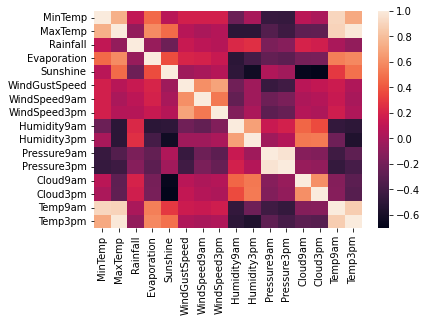

In [7]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Date', ylabel='count'>

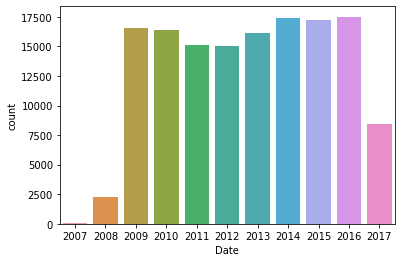

In [8]:
sns.countplot(x = pd.to_datetime(df.Date).dt.year)

In [9]:
input_cols = list(df.columns)[1 : -1] # RainTomorrow is y and date is not useful to predictions

In [10]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


### Using date to find out the count of rainy days on each specific day-month
##### This may help predict rain better (This was not done in the original jovian video)

In [11]:
df.Date = pd.to_datetime(df.Date)
df['day_month'] = df.Date.dt.strftime('%d-%m')
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day_month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,01-12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,02-12


In [12]:
d_m_series = df[df.RainToday == 'Yes'].day_month.value_counts()
d_m_series.head()

23-05    158
11-07    144
17-06    140
23-07    138
17-08    134
Name: day_month, dtype: int64

In [13]:
len(d_m_series)

366

In [14]:
df["rain_count"] = df.day_month.apply(lambda x : d_m_series[x])

In [15]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day_month,rain_count
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,01-12,97
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,02-12,81


### Zero null values in rain_count

In [16]:
df.rain_count.isnull().sum()

0

### Dropping Date and day_month columns

In [17]:
df.drop(['Date', 'day_month'], axis = 1, inplace=True)

In [18]:
numeric_cols = df.select_dtypes(include = np.number).columns.to_list()
categorical_cols = df.select_dtypes('object').columns.to_list()

In [19]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'rain_count']


In [20]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


## Impute Missing Numeric Values with mean value of column

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 90% Train, 10% Test, 10% Validation
train, test = train_test_split(df, test_size = 0.1)
validation, test = train_test_split(test, test_size = 0.5)

In [22]:
len(train)

127973

In [23]:
len(validation)

7110

In [24]:
len(test)

7110

In [25]:
train.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,rain_count
122431,Perth,14.3,18.5,9.4,1.2,8.2,WSW,43.0,WSW,WSW,...,63.0,1014.0,1015.4,6.0,6.0,16.4,18.0,Yes,Yes,92
85717,Brisbane,9.9,23.6,0.0,4.0,9.8,WSW,20.0,SW,SE,...,45.0,1024.0,1021.6,0.0,4.0,16.1,22.7,No,No,122


##### Mean value should be taken from training dataset only (Not in video)

In [26]:
imputer = SimpleImputer(strategy = 'mean').fit(train[numeric_cols])

In [27]:
train[numeric_cols] = imputer.transform(train[numeric_cols])
validation[numeric_cols] = imputer.transform(validation[numeric_cols])
test[numeric_cols] = imputer.transform(test[numeric_cols])

In [28]:
train[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
rain_count       0
dtype: int64

# Scaling Numeric Features

In [29]:
train.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,rain_count
min,-8.5,-4.1,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,980.5,977.1,0.0,0.0,-7.0,-4.4,20.0
max,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,8.0,40.2,46.7,158.0


In [30]:
from sklearn.preprocessing import MinMaxScaler

#Again taking only train data set for scaling
scaler = MinMaxScaler().fit(train[numeric_cols])

In [31]:
train[numeric_cols] = scaler.transform(train[numeric_cols])
validation[numeric_cols] = scaler.transform(validation[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

In [32]:
train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,rain_count
count,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000,127973.000000
mean,0.487713,0.523335,0.006342,0.037675,0.525398,0.263354,0.107645,0.214004,0.685643,0.515109,0.614260,0.610654,0.493372,0.563198,0.508008,0.510375,0.480972
std,0.150692,0.136199,0.022706,0.021820,0.188453,0.101997,0.068065,0.100179,0.191227,0.205341,0.111648,0.107068,0.253033,0.262877,0.137126,0.134459,0.150857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.421456,0.000000,0.027586,0.525398,0.193798,0.053846,0.149425,0.565657,0.370000,0.545455,0.542400,0.333333,0.500000,0.408898,0.412916,0.369565
50%,0.483491,0.511494,0.000000,0.037675,0.525398,0.255814,0.100000,0.214004,0.696970,0.515109,0.614260,0.610654,0.493372,0.563198,0.504237,0.502935,0.478261
75%,0.596698,0.618774,0.002156,0.037675,0.600000,0.310078,0.146154,0.275862,0.828283,0.650000,0.682645,0.676800,0.666667,0.750000,0.603814,0.600783,0.579710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Encoding Categorical Data

#### Filling all the NaN values in categorical_cols with 'Unknown'

In [33]:
train[categorical_cols].isna().sum()

Location           0
WindGustDir     8423
WindDir9am      9046
WindDir3pm      3400
RainToday       1270
RainTomorrow       0
dtype: int64

In [34]:
train[categorical_cols] = train[categorical_cols].fillna('Unknown')
validation[categorical_cols] = validation[categorical_cols].fillna('Unknown')
test[categorical_cols] = test[categorical_cols].fillna('Unknown')

In [35]:
train[categorical_cols].isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [36]:
train_Encoded = pd.get_dummies(train[categorical_cols], drop_first=True)
validation_Encoded = pd.get_dummies(validation[categorical_cols], drop_first=True)
test_Encoded = pd.get_dummies(test[categorical_cols], drop_first=True)

In [37]:
X_train = pd.concat([ train.drop(categorical_cols, axis = 1), train_Encoded.drop('RainTomorrow_Yes', axis = 1)], axis = 1)
X_validation = pd.concat([ validation.drop(categorical_cols, axis = 1), validation_Encoded.drop('RainTomorrow_Yes', axis = 1)], axis = 1)
X_test = pd.concat([ test.drop(categorical_cols, axis = 1), test_Encoded.drop('RainTomorrow_Yes', axis = 1)], axis = 1)

In [38]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Unknown,RainToday_Yes
122431,0.537736,0.432950,0.025337,0.008276,0.565517,0.286822,0.069231,0.229885,0.858586,0.63,...,0,0,0,0,0,0,0,1,0,1
85717,0.433962,0.530651,0.000000,0.027586,0.675862,0.108527,0.053846,0.022989,0.565657,0.45,...,1,0,0,0,0,0,0,0,0,0
130024,0.410377,0.463602,0.001078,0.023448,0.200000,0.271318,0.184615,0.252874,0.636364,0.44,...,0,0,0,0,0,0,0,0,0,0
16085,0.485849,0.429119,0.000000,0.037675,0.525398,0.263354,0.000000,0.000000,0.777778,0.74,...,0,0,0,0,1,0,0,0,0,0
132817,0.344340,0.369732,0.003235,0.016552,0.717241,0.240310,0.100000,0.275862,0.565657,0.54,...,1,0,0,0,0,0,0,0,0,1


In [39]:
y_train = train['RainTomorrow']
y_validation = validation['RainTomorrow']
y_test = test.RainTomorrow

In [40]:
y_train.head()

122431    Yes
85717      No
130024     No
16085     Yes
132817     No
Name: RainTomorrow, dtype: object

# Training
##### Notice that target values have yes and no strings rather than 1 and 0

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [42]:
%%time
model.fit(X_train, y_train)

CPU times: total: 7.88 s
Wall time: 8.05 s


DecisionTreeClassifier(random_state=42)

# Evaluation

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
train_pred = model.predict(X_train)

In [45]:
train_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [46]:
pd.value_counts(train_pred)

No     99215
Yes    28758
dtype: int64

##### Accuracy on training set is 100 percent

In [47]:
accuracy_score(train_pred, y_train)

1.0

##### Most probablities seem close to 1, so the model is very confident on its predictions

In [48]:
train_proba = model.predict_proba(X_train)
train_proba

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##### Verification that the model is absolutely confident on training set

In [49]:
np.unique(train_proba, axis=0)  

array([[0., 1.],
       [1., 0.]])

In [50]:
model.score(X_validation, y_validation)

0.7879043600562587

##### Model is barely better than always answering No
### Model is overfitting

In [51]:
y_validation.value_counts() / len(y_validation)

No     0.781716
Yes    0.218284
Name: RainTomorrow, dtype: float64

# Visualisation

In [52]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.348\nsamples = 127973\nvalue = [99215, 28758]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.25\nsamples = 106810\nvalue = [91177, 15633]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.2\nsamples = 89774\nvalue = [79654, 10120]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.513\ngini = 0.438\nsamples = 17036\nvalue = [11523, 5513]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.815\ngini = 0.471\nsamples = 21163\nvalue = [8038, 13125]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.291\ngini = 0.497\nsamples = 10820\nvalue = [5839, 4981]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pressure3pm <= 0.609\ngini = 0.335\nsamples = 10343\nvalue = [2199, 8144]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

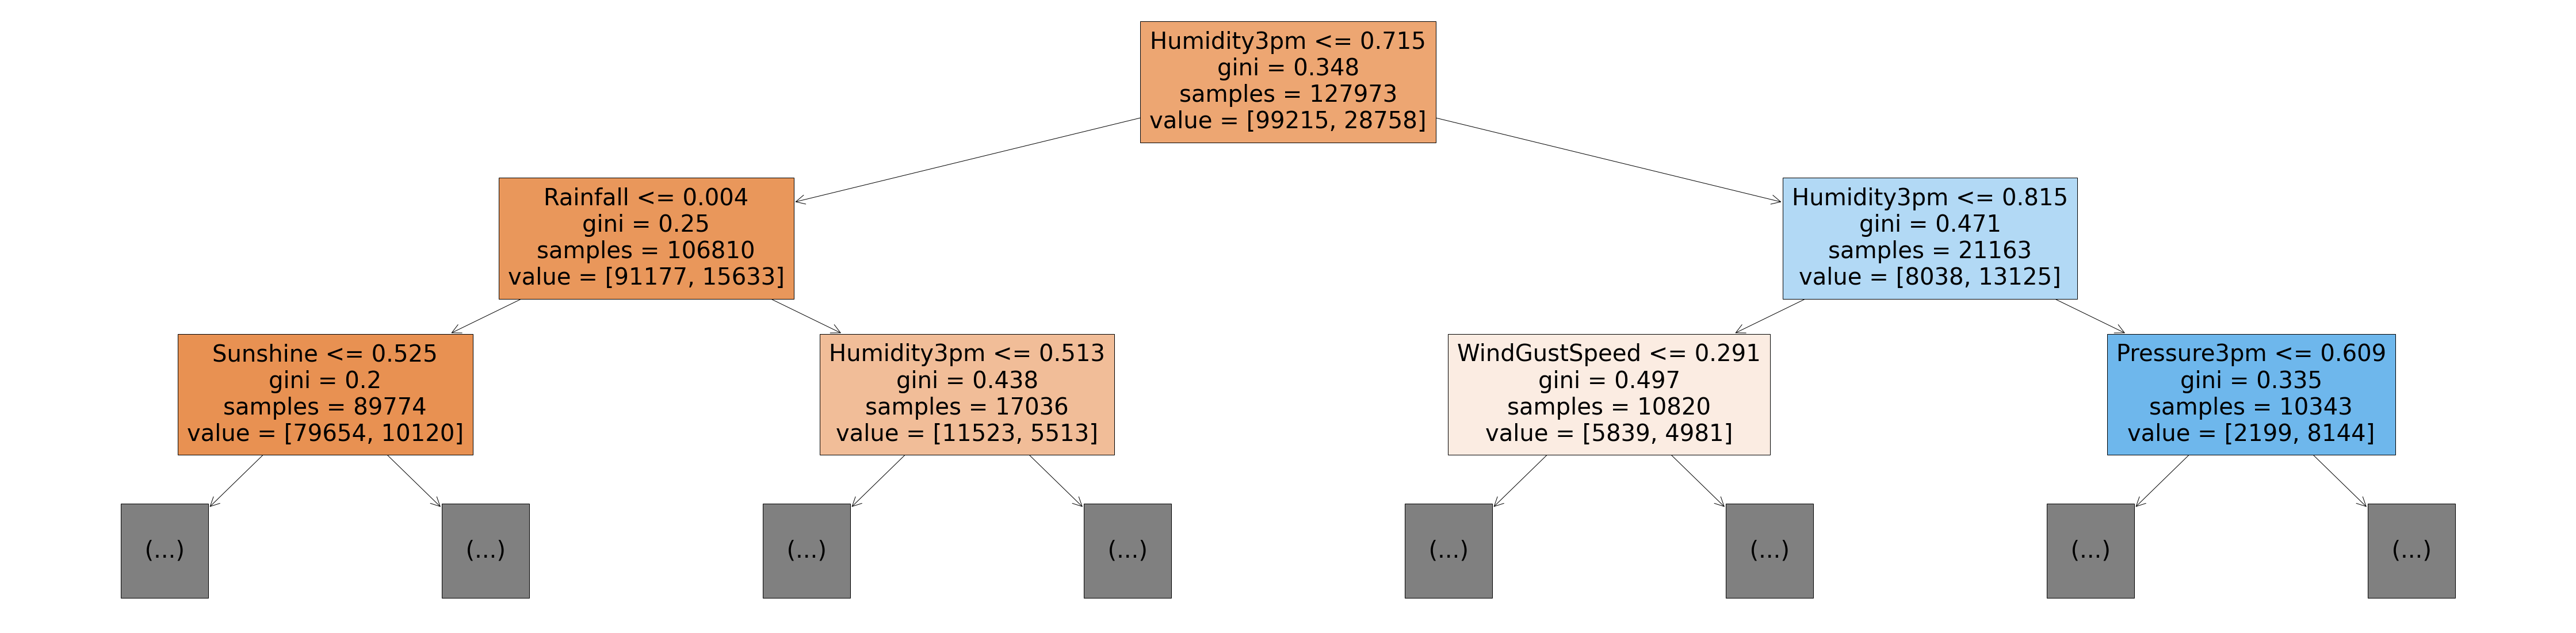

In [53]:
plt.figure(figsize = (80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

In [54]:
model.tree_.max_depth

47

In [55]:
tree_text = export_text(model, max_depth=15, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.59
|   |   |   |   |--- WindGustSpeed <= 0.38
|   |   |   |   |   |--- Humidity3pm <= 0.31
|   |   |   |   |   |   |--- WindGustSpeed <= 0.26
|   |   |   |   |   |   |   |--- Location_MelbourneAirport <= 0.50
|   |   |   |   |   |   |   |   |--- rain_count <= 0.13
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- rain_count >  0.13
|   |   |   |   |   |   |   |   |   |--- Sunshine <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- Sunshine >  0.00
|   |   |   |   |   |   |   |   |   |   |--- Location_Perth <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- Location_Woomera <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |   |--- Humidity9am <= 0.83
|   |   |   |   |   |   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |   

# Feature Importances

In [56]:
model.feature_importances_

array([3.58698132e-02, 3.19667788e-02, 5.73241546e-02, 2.12110423e-02,
       4.53337218e-02, 5.39980503e-02, 2.50994778e-02, 2.66952917e-02,
       3.69212128e-02, 2.56261993e-01, 3.50788557e-02, 6.09114073e-02,
       1.30008837e-02, 1.59223170e-02, 3.18438508e-02, 3.19902054e-02,
       4.14638957e-02, 1.91384775e-03, 1.36639945e-03, 2.34611402e-04,
       1.48978864e-03, 9.58073683e-04, 7.36864667e-04, 1.34126706e-03,
       1.07766376e-03, 1.17490058e-03, 8.53867196e-04, 1.60272514e-03,
       1.59495118e-03, 7.74545972e-05, 1.03773587e-03, 1.88560310e-03,
       5.74798531e-04, 1.02317341e-03, 1.20468952e-03, 1.01315887e-03,
       9.56003075e-04, 1.00405919e-03, 1.70298212e-03, 1.73535044e-03,
       4.60912198e-04, 5.94535091e-04, 1.50520737e-03, 1.27123553e-03,
       1.30285108e-03, 9.42705853e-04, 9.35956272e-04, 1.53696526e-03,
       1.15901792e-03, 1.77682347e-03, 1.10518962e-03, 1.42252923e-03,
       1.46677752e-03, 1.55044116e-03, 1.21184750e-03, 4.16431556e-04,
      

In [57]:
importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : model.feature_importances_
}).sort_values('Importance', ascending = False)

In [58]:
importance_df.head(10)

,Feature,Importance
9,Humidity3pm,0.256262
11,Pressure3pm,0.060911
2,Rainfall,0.057324
5,WindGustSpeed,0.053998
4,Sunshine,0.045334
16,rain_count,0.041464
8,Humidity9am,0.036921
0,MinTemp,0.035870
10,Pressure9am,0.035079
15,Temp3pm,0.031990


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

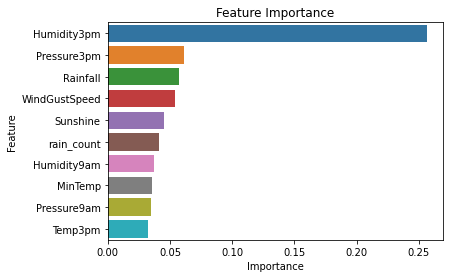

In [59]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')

# HyperParameter Tuning and Overfitting

In [60]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
%%time
model.fit(X_train, y_train)

CPU times: total: 1.38 s
Wall time: 1.37 s


DecisionTreeClassifier(max_depth=3, random_state=42)

In [62]:
train_pred = model.predict(X_train)
accuracy_score(train_pred, y_train)

0.8287607542215936

In [63]:
model.score(X_train, y_train)

0.8287607542215936

In [64]:
model.score(X_validation, y_validation)

0.8275668073136427

In [65]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.348\nsamples = 127973\nvalue = [99215, 28758]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.25\nsamples = 106810\nvalue = [91177, 15633]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.2\nsamples = 89774\nvalue = [79654, 10120]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.367\nsamples = 14611\nvalue = [11067, 3544]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.16\nsamples = 75163\nvalue = [68587, 6576]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.513\ngini = 0.438\nsamples = 17036\nvalue = [11523, 5513]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.29\nsamples = 5374\nvalue = [4429, 945]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.477\nsamples = 11662\nvalue = [7094, 4568]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.815\ngini = 0.471\nsamples = 21163\nvalue = [8038, 13125]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.291\ngini = 0.497\nsamples = 10820\nvalue = [5839, 4981]\n

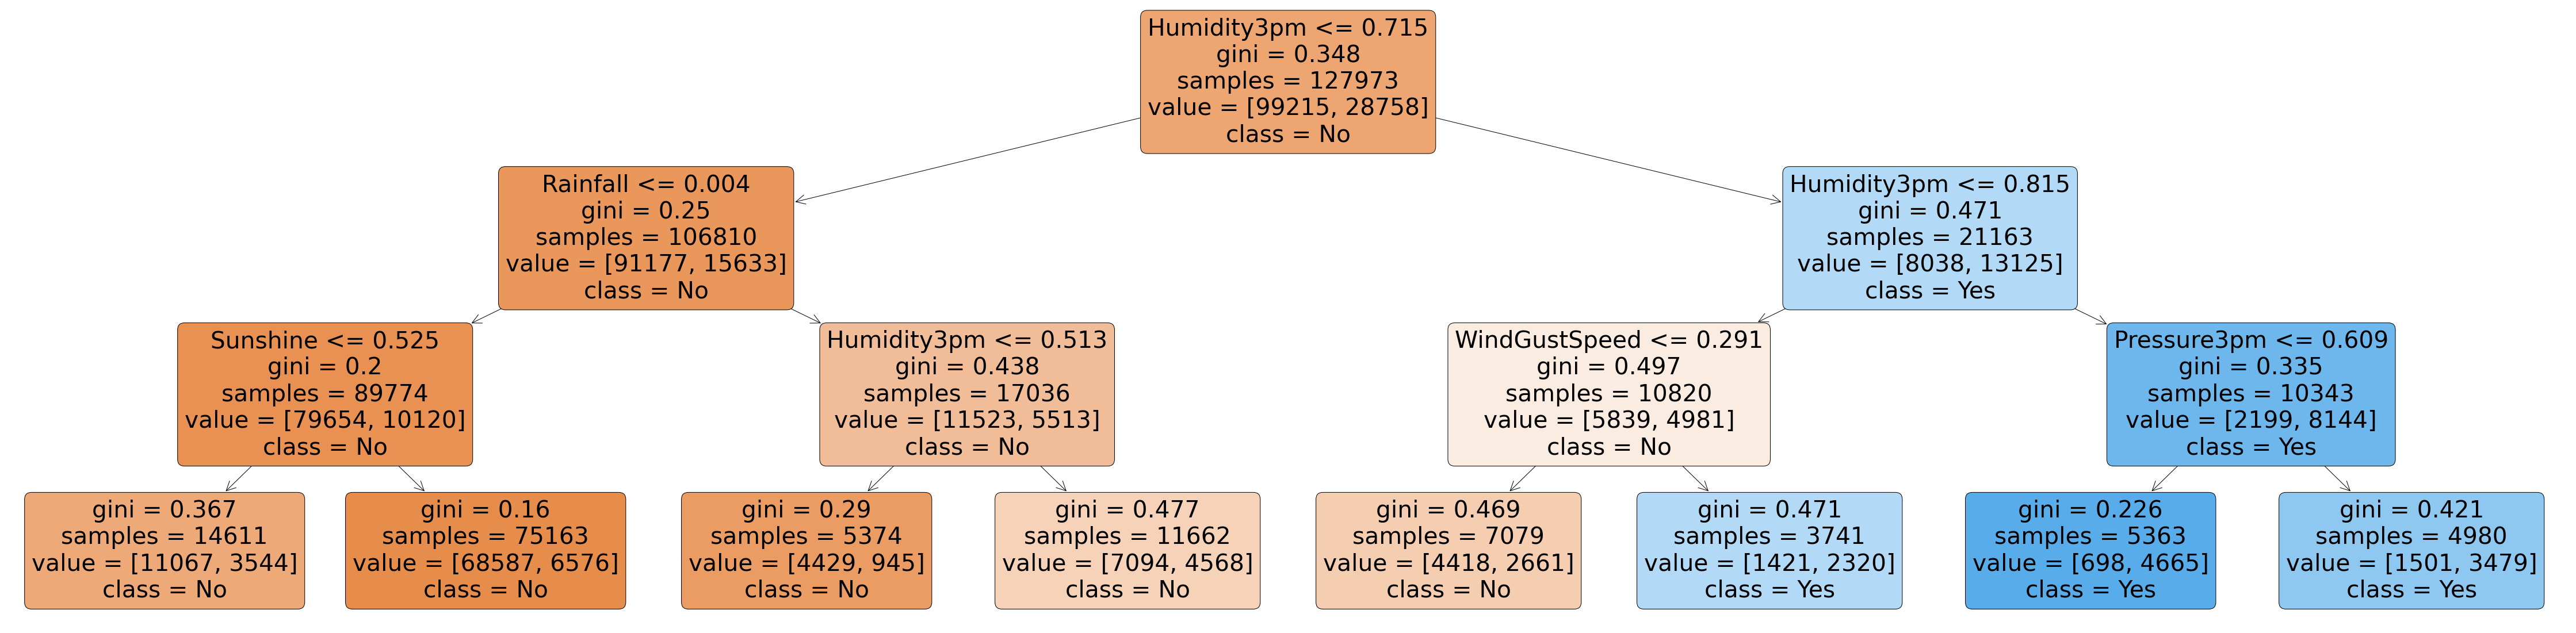

In [66]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [67]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.81
|   |   |--- WindGustSpeed <= 0.29
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.29
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.81
|   |   |--- Pressure3pm <= 0.61
|   |   |   |--- class: Yes
|   |   |--- Pressure3pm >  0.61
|   |   |   |--- class: Yes



In [68]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    val_error = 1 - model.score(X_validation, y_validation)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [69]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 1min 29s
Wall time: 1min 32s


In [70]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184969,0.187904
1,2,0.178264,0.179606
2,3,0.171239,0.172433
3,4,0.167903,0.169480
4,5,0.162183,0.163994
5,6,0.159268,0.162447
6,7,0.155666,0.160619
7,8,0.150852,0.158790
8,9,0.144945,0.159494
9,10,0.137732,0.163150


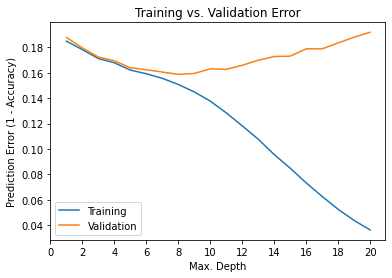

In [71]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

### Max Depth of 7 gives the lowest error on validation set

In [72]:
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8443343517773281

In [73]:
model.score(X_validation, y_validation)

0.8393811533052039

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [74]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8453189344627382

In [75]:
model.score(X_validation, y_validation)

0.8378340365682138

In [76]:
model.tree_.max_depth

13

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [79]:
%%time
model.fit(X_train, y_train)

CPU times: total: 1min 32s
Wall time: 33 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [80]:
model.score(X_train, y_train)

0.9999687434068124

In [81]:
model.score(X_validation, y_validation)

0.8572433192686357

In [82]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.26, 0.74],
       [0.99, 0.01],
       [0.93, 0.07],
       ...,
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [1.  , 0.  ]])

In [83]:
val_probs = model.predict_proba(X_validation)
val_probs

array([[0.99, 0.01],
       [0.8 , 0.2 ],
       [0.92, 0.08],
       ...,
       [0.95, 0.05],
       [0.89, 0.11],
       [0.69, 0.31]])

In [84]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'WindDir9am_NNW <= 0.5\ngini = 0.35\nsamples = 80930\nvalue = [99089, 28884]\nclass = No'),
 Text(0.25, 0.625, 'Humidity9am <= 0.763\ngini = 0.344\nsamples = 76540\nvalue = [94429, 26690]\nclass = No'),
 Text(0.125, 0.375, 'Temp3pm <= 0.4\ngini = 0.25\nsamples = 49112\nvalue = [66451, 11426]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Location_Brisbane <= 0.5\ngini = 0.457\nsamples = 27428\nvalue = [27978, 15264]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pressure3pm <= 0.476\ngini = 0.435\nsamples = 4390\nvalue = [4660, 2194]\nclass = No'),
 Text(0.625, 0.375, 'Pressure9am <= 0.444\ngini = 0.497\nsamples = 885\nvalue = [624, 736]\nclass = Yes'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pressure3pm <= 0.614\ngini = 0.39\nsamples = 3505\nvalue = [4036, 1458]\nclass = No'),
 

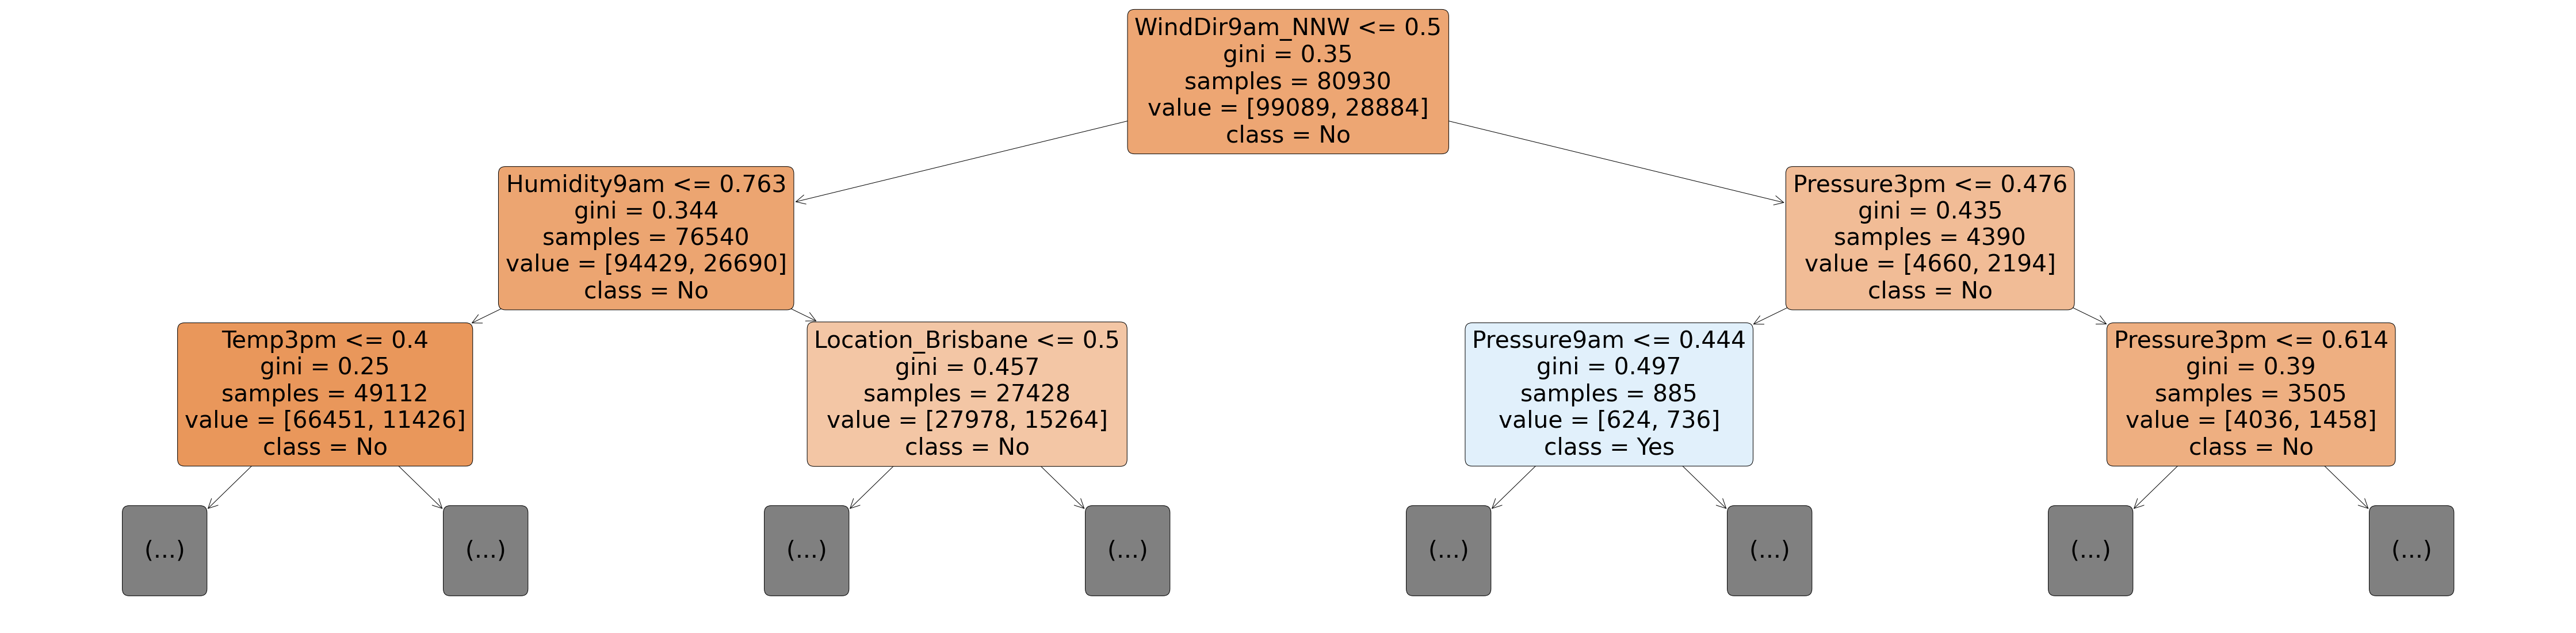

In [85]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [86]:
len(model.estimators_)

100

In [87]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [88]:
importance_df.head(15)

,feature,importance
9,Humidity3pm,0.133781
2,Rainfall,0.059305
11,Pressure3pm,0.053377
8,Humidity9am,0.050880
4,Sunshine,0.050397
5,WindGustSpeed,0.048439
10,Pressure9am,0.046964
15,Temp3pm,0.044181
0,MinTemp,0.041513
1,MaxTemp,0.041227


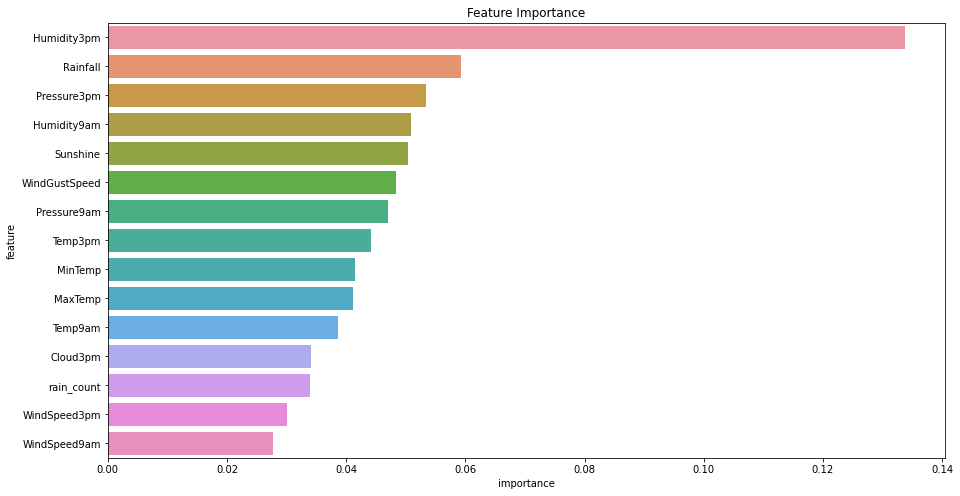

In [89]:
plt.figure(figsize=(15,8))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

In [90]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train)

In [91]:
base_train_acc = base_model.score(X_train, y_train)
base_val_acc = base_model.score(X_validation, y_validation)

In [92]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999687434068124, 0.8572433192686357)

In [93]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [94]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [95]:
model.score(X_train, y_train), model.score(X_validation, y_validation)

(0.9869113016026818, 0.8440225035161744)

In [96]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_validation, y_validation)

In [97]:
test_params(max_depth=5)

(0.8198291827182296, 0.8222222222222222)

In [98]:
test_params(max_depth=26)

(0.9788627288568682, 0.8568213783403656)

In [99]:
test_params(max_leaf_nodes=2**5)

(0.8288623381494534, 0.8277074542897328)

In [100]:
test_params(max_leaf_nodes=2**20)

(0.9999921858517031, 0.8562587904360056)

In [101]:
base_accs # no max depth or max leaf nodes

(0.9999687434068124, 0.8572433192686357)

### max_features


In [102]:
test_params(max_features='log2')

(0.9999843717034061, 0.8558368495077355)

In [103]:
test_params(max_features=3)

(0.9999921858517031, 0.8513361462728551)

In [104]:
test_params(max_features=6)

(0.9999843717034061, 0.8558368495077355)

In [105]:
base_accs

(0.9999687434068124, 0.8572433192686357)

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [106]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9641408734654966, 0.8563994374120957)

In [107]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8501402639619294, 0.8441631504922644)

In [108]:
base_accs

(0.9999687434068124, 0.8572433192686357)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.


In [109]:
test_params(min_impurity_decrease=1e-7)

(0.9995858501402639, 0.8580872011251758)

In [110]:
test_params(min_impurity_decrease=1e-2)

(0.7752807232775664, 0.7817158931082981)

In [111]:
test_params(min_impurity_decrease=1e-6)

(0.9870753987169169, 0.8571026722925457)

In [112]:
base_accs

(0.9999687434068124, 0.8572433192686357)

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

###### Bootstraping is picking random rows from the training dataset with replacement, and then train the tree inside with that newly created dataset

In [113]:
test_params(bootstrap=False)

(1.0, 0.8596343178621659)

In [114]:
base_accs # By default bootstrap is true

(0.9999687434068124, 0.8572433192686357)

### `class_weight`

In [115]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [116]:
test_params(class_weight='balanced')

(1.0, 0.8571026722925457)

In [117]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999765575551093, 0.8558368495077355)

In [118]:
base_accs

(0.9999687434068124, 0.8572433192686357)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [119]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [120]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [121]:
model.score(X_train, y_train), model.score(X_validation, y_validation)

(0.9903026419635392, 0.8589310829817159)

In [122]:
base_accs

(0.9999687434068124, 0.8572433192686357)